In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv("Raw_Housing_Prices.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [4]:
data.describe

<bound method NDFrame.describe of                ID Date House was Sold  Sale Price  No of Bedrooms  \
0      7129300520     14 October 2017    221900.0               3   
1      6414100192    14 December 2017    538000.0               3   
2      5631500400    15 February 2016    180000.0               2   
3      2487200875    14 December 2017    604000.0               4   
4      1954400510    15 February 2016    510000.0               3   
...           ...                 ...         ...             ...   
21608   263000018         14 May 2017    360000.0               3   
21609  6600060120    15 February 2016    400000.0               4   
21610  1523300141        14 June 2017    402101.0               2   
21611   291310100     15 January 2016    400000.0               3   
21612  1523300157     14 October 2017    325000.0               2   

       No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0                 1.00               1180.0             

In [5]:
data.shape

(21613, 21)

In [6]:
data['mean_sales'] = data['Sale Price'].mean()
data['mean_sales'].head()

0    540198.435744
1    540198.435744
2    540198.435744
3    540198.435744
4    540198.435744
Name: mean_sales, dtype: float64

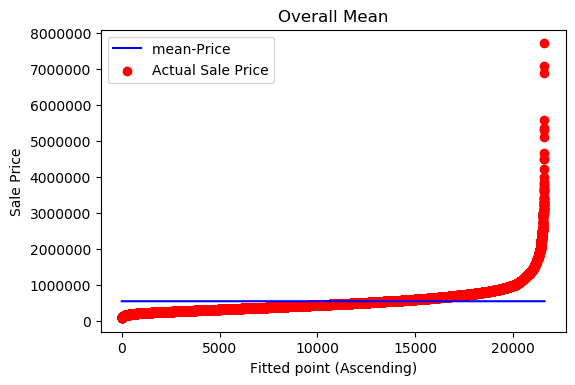

In [7]:
plt.figure(dpi = 100 )
k = range(0,len(data))
plt.scatter(k , data['Sale Price'].sort_values() , color ='red' ,label ="Actual Sale Price" )
plt.plot(k, data['mean_sales'].sort_values(), color = 'blue' , label = "mean-Price ")
plt.xlabel("Fitted point (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend()

In [8]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [9]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)

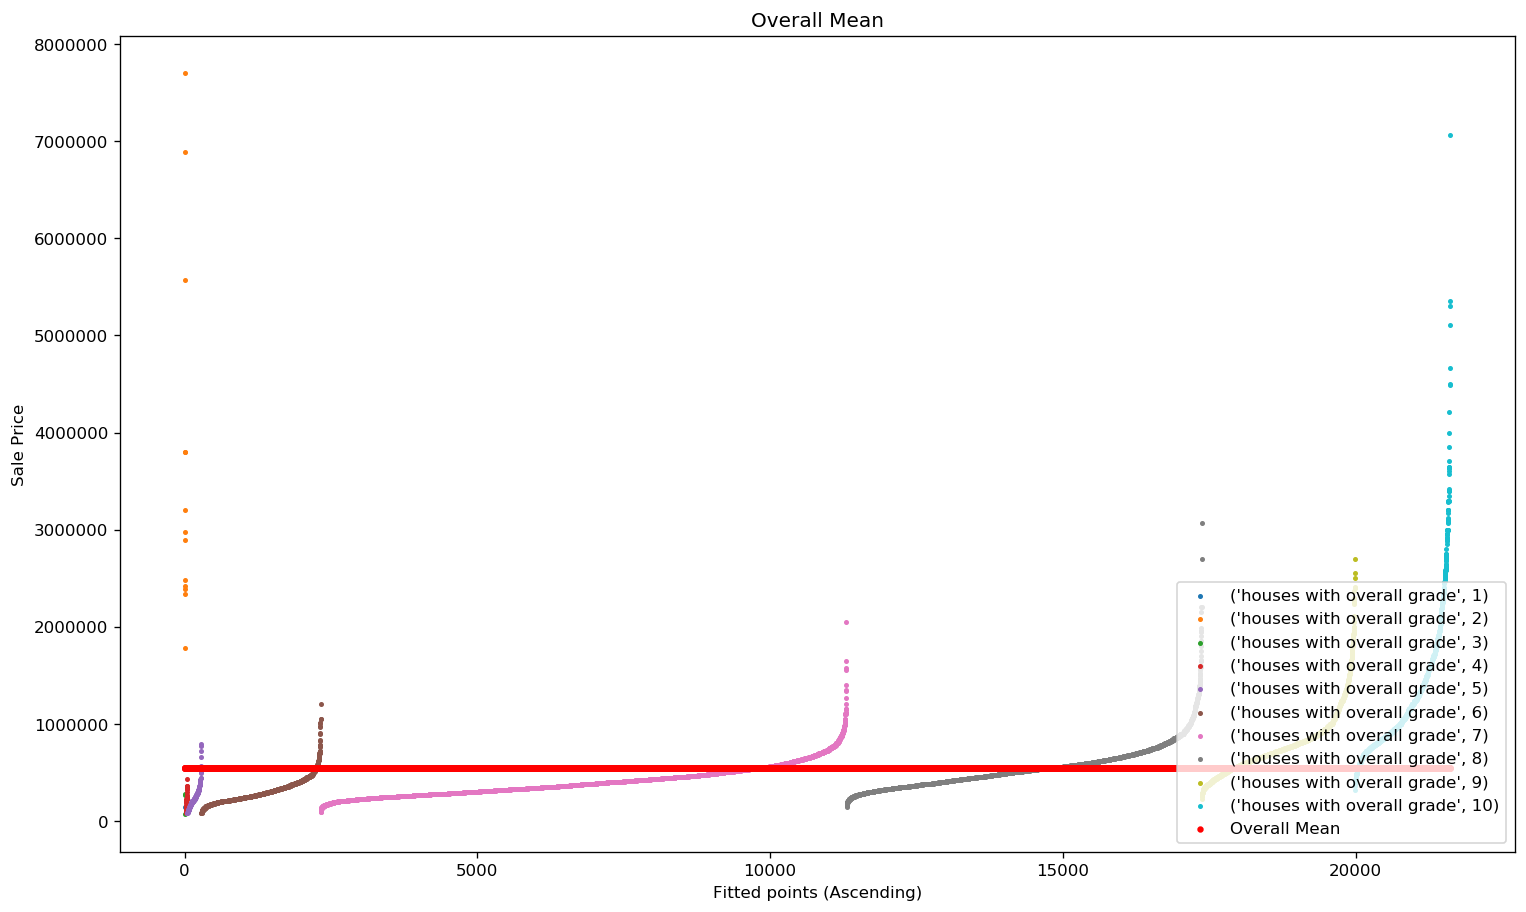

In [10]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # plotting
  plt.scatter( points, # x-axis
              np.sort(gradewise_list[i-1], axis = 0) , # y-axis
              label = ('houses with overall grade', i), s = 4 )            
  z = max(points) + 1 # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 8) 

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend( loc = 4)

In [11]:
grades_mean = data.pivot_table(values = 'Sale Price' , columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale Price,142000.0,3.710769e+06,205666.666667,214381.034483,248523.971074,301916.570658,402604.370865,542892.66271,773738.22218,1.239055e+06


In [12]:
# making new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
  
data['grade_mean'].head()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    402604.370865
1    402604.370865
2    301916.570658
3    402604.370865
4    542892.662710
Name: grade_mean, dtype: float64

In [13]:
gradewise_list =[]
for i in range(1,11):
    k = data["Sale Price"][data["Overall Grade"] == i ]
    gradewise_list.append(k)

In [14]:
classwise_list = []
for i in range(1,11):
    k = data["Sale Price"][data["Overall Grade"] == i]
    classwise_list.append(k)

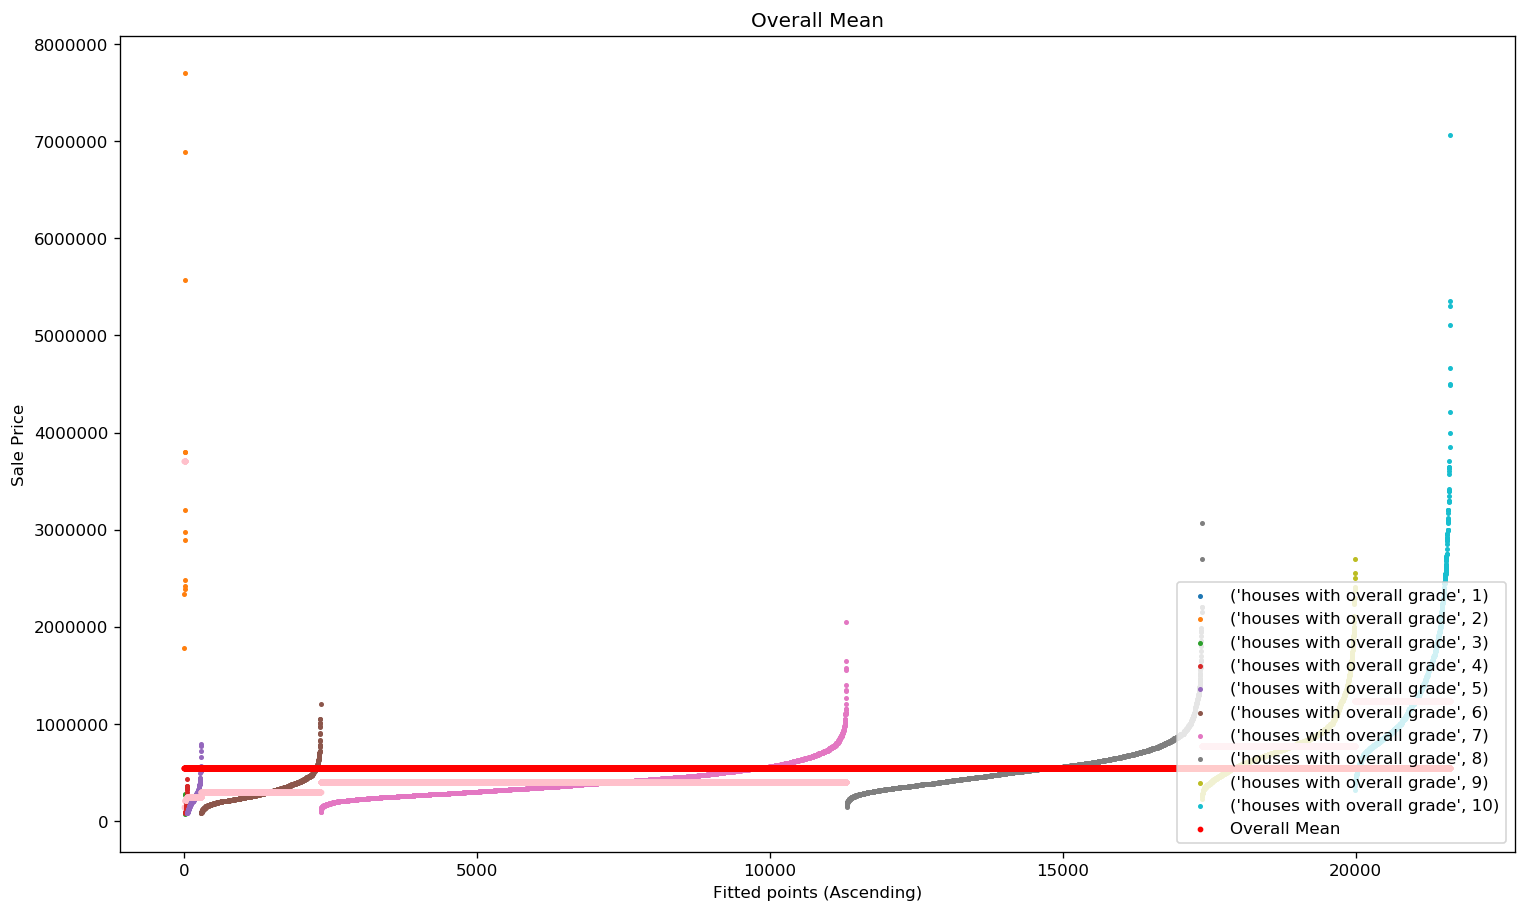

In [15]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

In [16]:
mean_difference = data['mean_sales'] - data['Sale Price']
grade_mean_difference = data['grade_mean'] - data['Sale Price']

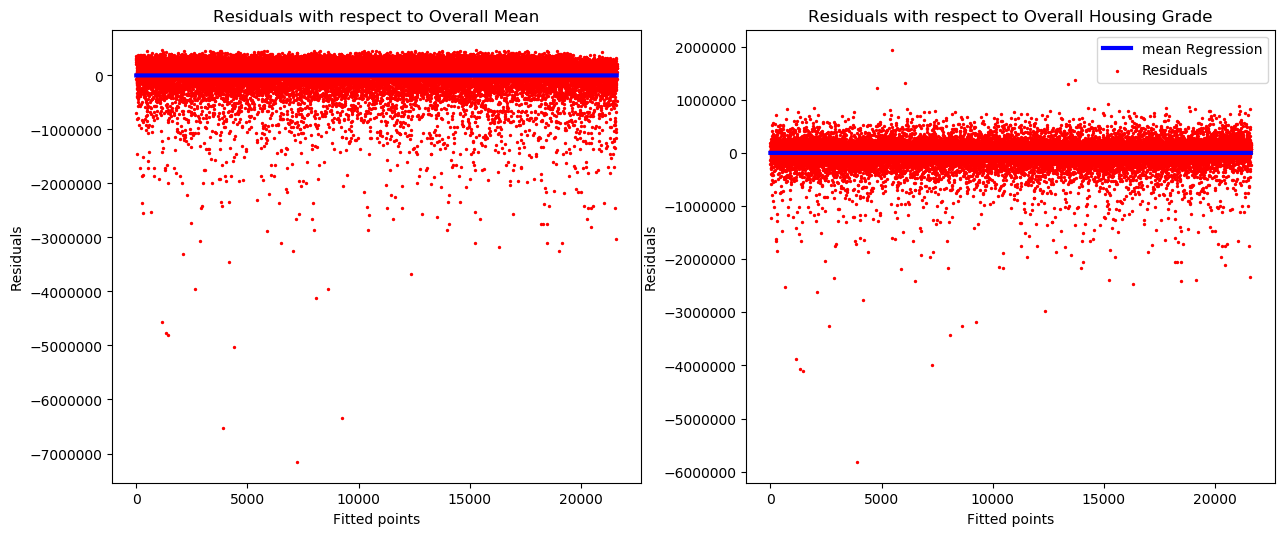

In [17]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'blue', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'blue', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

In [18]:
mean_error = sum(mean_difference)/len(data)
print(round(mean_error, 7))

nan


In [19]:
Y = data["Sale Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21613, 21613, 21613, 21613)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
y = data['Sale Price']
x = scaler.fit_transform(data.drop(columns = ["Sale Price"]))
x = pd.DataFrame(data = x, columns = data.drop(["Sale Price"].columns))


ValueError: could not convert string to float: '14 October 2017'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X = scaler.fit_transform(data.drop(columns = ['Sale Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale Price']).columns)
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X = scaler.fit_transform(data.drop(columns = ['Sale Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale Price']).columns)
X.head()

In [ ]:
sale_price = data["Sale Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({ 'sale price': sale_price,
                              'flat_area': flat_area})
sample_data

In [ ]:
plt.figure( dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label = 'sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()